<a href="https://colab.research.google.com/github/ash-victor/Text-Mining-Teaching/blob/main/Emotion_Dectection_Ashley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Load python packages
import pandas as pd
import numpy as np

In [ ]:
# Load data viz packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load python package for text cleaning
import neattext.functions as nfx

In [ ]:
# Read in csv file
data = pd.read_csv("emotion_dataset_raw.csv")

In [ ]:
# Preview the dataset
data.head(10)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
5,fear,I'm expecting an extremely important phonecall...
6,sadness,.Couldnt wait to see them live. If missing th...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...


In [ ]:
# Dataset shape
data.shape

(34792, 2)

In [ ]:
# Data types
data.dtypes

Emotion    object
Text       object
dtype: object

In [ ]:
# Check if there are null/missing values
data.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [ ]:
# Data distribution
data['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: >

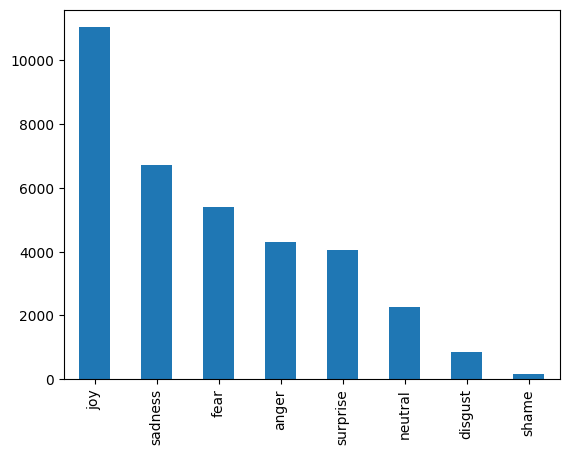

In [ ]:
# Plotting value counts
data['Emotion'].value_counts().plot(kind = 'bar')


<Axes: xlabel='Emotion', ylabel='count'>

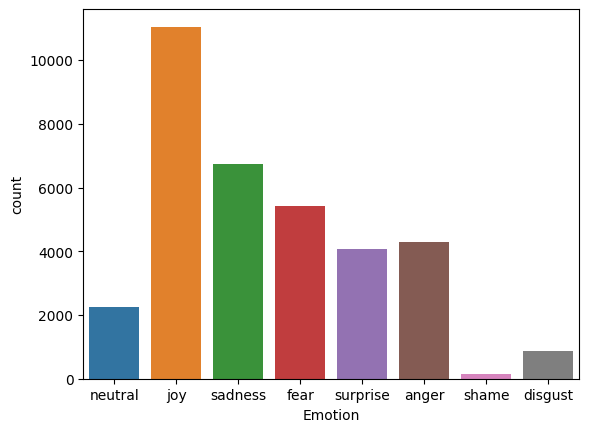

In [ ]:
# Plotting value counts using seaborn

sns.countplot(x = 'Emotion', data = data)

In [ ]:
# Performing sentiment analysis
from textblob import TextBlob

In [ ]:
# Create a definition for sentiment
def get_sentiment(text):
# Put our text into textblob
  blob = TextBlob(text)
# Get a polarity score
  sentiment = blob.sentiment.polarity

# put the score into categories (positive, negative, neutral)
  if sentiment > 0:
    result = "Positive"
  elif sentiment < 0:
    result = "Negative"
  else:
    result = "Neutral"
  return result


In [ ]:
get_sentiment("I love coding")

'Positive'

In [ ]:
# Apply out get_sentiment function to our dataset

data['Sentiment'] = data['Text'].apply(get_sentiment)

In [ ]:
data.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [ ]:
# Compare our emotions vs sentiment

data.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

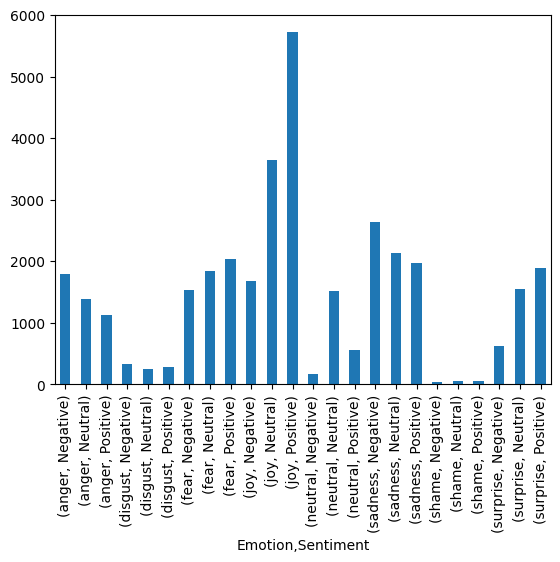

In [ ]:
data.groupby(['Emotion','Sentiment']).size().plot(kind = 'bar')

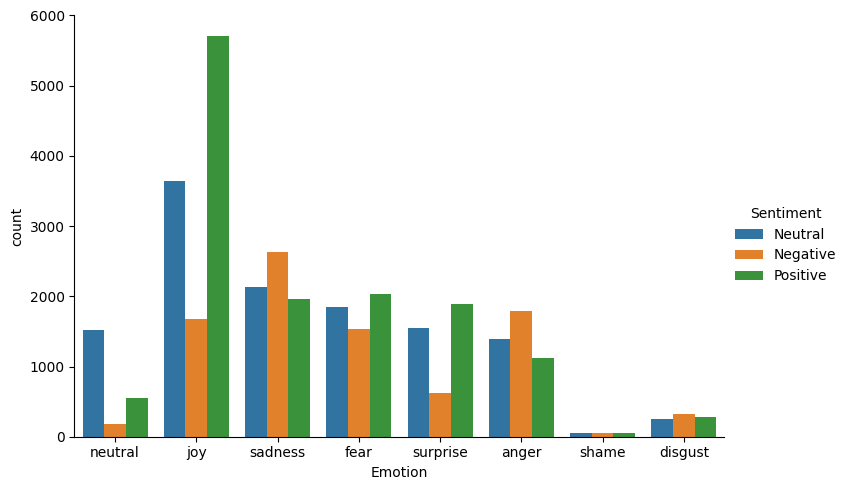

In [ ]:
sns.catplot(x = 'Emotion', data = data, hue = 'Sentiment', kind = 'count', aspect = 1.5)

In [ ]:
# Text cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# Remove stopwords
data['Clean_Text'] = data['Text'].apply(nfx.remove_stopwords)

In [ ]:
# Remove userhandles
data['Clean_Text'] = data['Clean_Text'].apply(nfx.remove_userhandles)

In [ ]:
# Remove punctuations
data['Clean_Text'] = data['Clean_Text'].apply(nfx.remove_punctuations)

In [ ]:
# Remove special characters
data['Clean_Text'] = data['Clean_Text'].apply(nfx.remove_special_characters)

In [ ]:
data.head(20)

,Emotion,Text,Sentiment,Clean_Text
0,neutral,Why ?,Neutral,
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral,ugh babe hugggzzz u babe naamazed nga ako e...
5,fear,I'm expecting an extremely important phonecall...,Positive,Im expecting extremely important phonecall min...
6,sadness,.Couldnt wait to see them live. If missing th...,Negative,Couldnt wait live missing NH7 wasnt painful en...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,Neutral,maken Tip 2 Stop op een moment dat je het hele...
8,surprise,En dan krijg je ff een cadeautje van een tweep...,Neutral,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Neutral,Drummer Boy bij op verzoek van welke u...


In [ ]:
# Make a word cloud
from wordcloud import WordCloud

In [ ]:
# create a definition to plot a word cloud

def plot_wordcloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize = (20,10))
  plt.imshow(mywordcloud, interpolation = 'bilinear')
  plt.show()

In [ ]:
# Extract keywords related to joy
from collections import Counter

In [ ]:
# Create a defition to extract keywords
def extract_keywords(text, num = 50):
  tokens = []
  for tok in text.split(' '):
    tokens.append(tok)
  most_common_words = Counter(tokens).most_common(num)
  return dict(most_common_words)

In [ ]:
# List of emotions
emotion_list = data['Emotion'].unique().tolist()

In [ ]:
joy_list = data[data['Emotion'] == 'joy']['Clean_Text'].tolist()

In [ ]:
# Join all the "joy" words into one string
joy_docx = ' '.join(joy_list)

In [ ]:
keyword_joy = extract_keywords(joy_docx)

In [ ]:
print(keyword_joy)

{'': 9571, 'day': 733, 'amp': 679, 'time': 604, 'Im': 559, 'work': 516, 'today': 480, 'like': 478, 'tomorrow': 470, 'Christmas': 461, 'love': 452, 'happy': 378, 'good': 347, 'night': 338, 'got': 328, 'going': 304, 'home': 303, 'school': 300, 'morning': 290, 'joy': 289, '2': 267, 'life': 262, 'hours': 252, 'week': 234, 'feel': 227, 'year': 225, 'days': 208, 'tonight': 206, 'me': 205, 'long': 204, 'people': 203, 'family': 202, 'great': 198, 'sleep': 187, 'God': 186, 's': 184, 'new': 182, 'know': 177, 'hour': 172, 'friend': 169, 'felt': 167, 'RT': 166, 'cant': 165, 'it': 165, 'friends': 161, 'feeling': 159, 'christmas': 150, 'think': 148, 'excited': 147, 'right': 142}


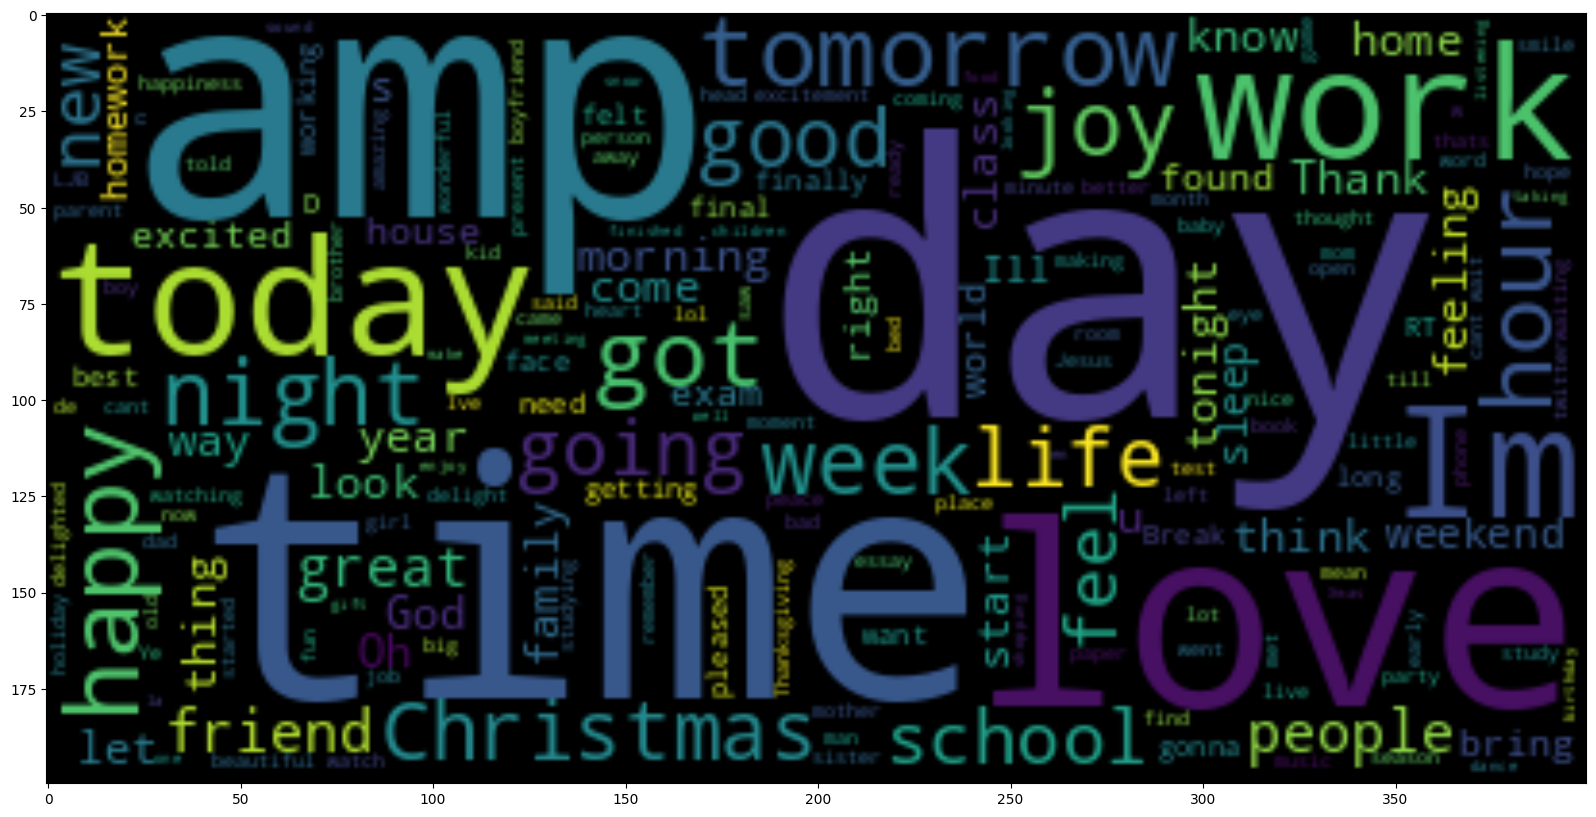

In [ ]:
# Plot the wordcloud

plot_wordcloud(joy_docx)

In [ ]:
# Machine learning model building: Naive Bayes

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Build Features from our text
XFeatures = data['Clean_Text']
ylabels = data['Emotion']

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(XFeatures)

In [ ]:
# Get feature names
cv.get_feature_names_out()

array(['00', '000', '000me', ..., 'zz', 'zzap', 'zzzz'], dtype=object)

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size = 0.3, random_state = 42)

In [ ]:
# Build model

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Test the accuracy
nb_model.score(X_test, y_test)

0.5645717570415788

In [ ]:
# Predictions

y_predict = nb_model.predict(X_test)

In [ ]:
sample_text = ['I love coding']

In [ ]:
vector = cv.transform(sample_text).toarray()

In [ ]:
nb_model.predict(vector)

array(['joy'], dtype='<U8')

In [ ]:
nb_model.predict_proba(vector)

array([[1.74804392e-02, 2.51772698e-03, 1.49539936e-01, 6.11248768e-01,
        6.30738929e-03, 1.21453778e-01, 4.63527236e-05, 9.14056095e-02]])

In [ ]:
nb_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [ ]:
np.max(nb_model.predict_proba(vector))

0.61124876820657

In [ ]:
# Create a definition for predicting emotion

def predict_emotion(sample_text, model):
  vector = cv.transform(sample_text).toarray()    #Tranforming our text data into vectors (numbers)
  prediction = model.predict(vector)              # Putting in our data into the model
  pred_proba = model.predict_proba(vector)        # Confidence of our prediction
  pred_percent = dict(zip(model.classes_, pred_proba[0]))
  print(prediction)
  return pred_percent

In [ ]:
predict_emotion(sample_text,nb_model)

['joy']


{'anger': 0.017480439162633938,
 'disgust': 0.0025177269839936492,
 'fear': 0.14953993608047983,
 'joy': 0.61124876820657,
 'neutral': 0.006307389289201906,
 'sadness': 0.12145377802929332,
 'shame': 4.635272360866373e-05,
 'surprise': 0.09140560952421956}

In [ ]:
# Logistic Regression Import packages
from sklearn.linear_model import LogisticRegression


In [ ]:
lr_model = LogisticRegression(multi_class = 'multinomial')
lr_model.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
# Accuracy
lr_model.score(X_test,y_test)

0.6215750143705691

In [ ]:
# Prediction
predict_emotion(sample_text, lr_model)

['joy']


{'anger': 0.03089898278774102,
 'disgust': 0.010893060998471336,
 'fear': 0.06206931342904538,
 'joy': 0.5074005463011358,
 'neutral': 0.13069288966002215,
 'sadness': 0.13265450474697468,
 'shame': 0.0014601090560879169,
 'surprise': 0.12393059302052178}